In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import bernoulli

In [18]:
# A,B,C are parameters of the Cournot model
# best response correspondence depending on q
def best_response(A,B,C,q):
    return (A - C - q)/(2*B)

# the nash equilibrium is the fixed point of the best response correspondence
def fixed_point(A,B,C):
    return (A - C)/((2*B + 1))

def simulator(A,B,C,e,bin_count,n): 
    
    # A,B,C - parameters of Cournot model
    # e - error rate epsilon
    # bin_count - number of bins for plotting frequency distribution
    # n - number of samples
    
    # set initial states randomly
    quantities_produced_1 = [np.random.uniform(0, (A-C)/B)]
    quantities_produced_2 = [np.random.uniform(0, (A-C)/B)]
    q_1 = quantities_produced_1[0]
    q_2 = quantities_produced_2[0]
    for i in range(n):
        br_1 = best_response(A,B,C,q_2)
        br_2 = best_response(A,B,C,q_1)

        # select best response for firm 1 w.p. 1-e, otherwise sample from uniform distribution on [0,R]
        r_1 = bernoulli.rvs(1-e, size=1)[0]
        if r_1 == 1:
            q_1 = br_1
        else:
            q_1 = np.random.uniform(0, (A-C)/B)

        # select best response for firm 2 w.p. 1-e, otherwise sample from uniform distribution on [0,R]
        r_2 = bernoulli.rvs(1-e, size=1)[0]
        if r_2 == 1:
            q_2 = br_2
        else:
            q_2 = np.random.uniform(0, (A-C)/B)

        quantities_produced_1.append(q_1)
        quantities_produced_2.append(q_2)
        
    
    # plotting stuff
    max_val = (A - C)/B
    i = 1
    count = 0
    starting_point = fixed_point(A,B,C) + ((A - C)/B)/(bin_count*2)

    # create nice bins for histogram
    bins_list = [starting_point]
    while count < max_val:
        bins_list.append(starting_point + i*((A - C)/B)/bin_count)
        count = bins_list[-1]
        i +=1 

    i = 1
    while count > 0:
        bins_list.append(starting_point - i*((A - C)/B)/bin_count)
        count = bins_list[-1]
        i +=1 

    bins_list = sorted(bins_list)
    bins_list = [bin for bin in bins_list]
    bins_list[0] = 0
    
    plt.figure(figsize=(8, 6))
    data = plt.hist(quantities_produced_1[n-n//4:], bins=bins_list, density=True)
    plt.title('\u03B5 = ' + str(e),fontsize=20)
    plt.xlabel('Quantities Produced by Firm i', fontsize=18)
    plt.ylabel('Density', fontsize=18)
    plt.xticks(fontsize=16 )
    plt.yticks(fontsize=16 )
    

    plt.show()
    return data, quantities_produced_1

In [13]:
# calculate mass in a ball of a given size about the equilibrium
def stationary(quantities, size, A, B, C):
    close_points = [i for i in quantities if i > fixed_point(A,B,C) - size and i < fixed_point(A,B,C) + size]
    return len(close_points)/len(quantities)

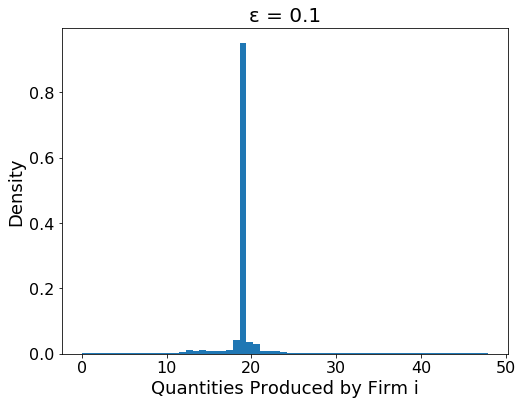

0.8048819511804882


In [19]:
A = 100
B = 2
C = 5
e = 0.10
data, quantities=simulator(A,B,C,e,60,100000)
print(stationary(quantities,1,A,B,C))

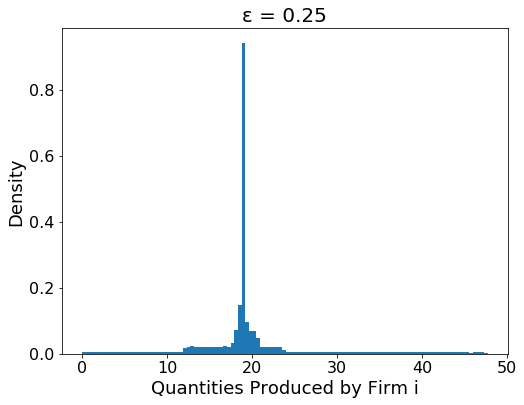

0.5597444025559745


In [21]:
A = 100
B = 2
C = 5
e = 0.25
data, quantities=simulator(A,B,C,e,110,100000)
print(stationary(quantities,1,A,B,C))

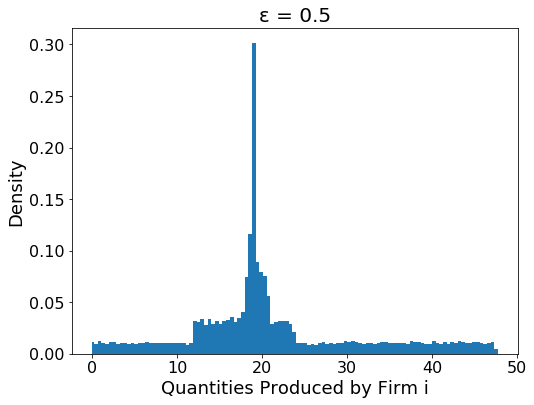

0.2723372766272337


In [22]:
A = 100
B = 2
C = 5
e = 0.5
data, quantities=simulator(A,B,C,e,110,100000)
print(stationary(quantities,1,A,B,C))